In [16]:
# CSV einlesen
df = pd.read_csv(r'C:\Users\juanc\Documents\Ausbildung_Informatik\1_Praktikum\Statistik\heritage-index-of-economic-freedom-20250620083959.csv')

print(df.columns)


Index(['Country', 'Index Year', 'Overall Score', 'Property Rights',
       'Government Integrity', 'Judicial Effectiveness', 'Tax Burden',
       'Government Spending', 'Fiscal Health', 'Business Freedom',
       'Labor Freedom', 'Monetary Freedom', 'Trade Freedom',
       'Investment Freedom', 'Financial Freedom'],
      dtype='object')


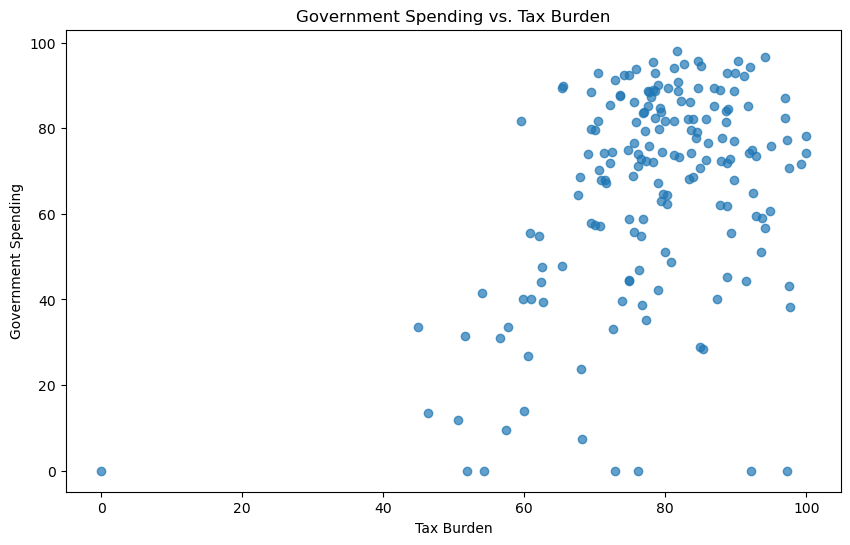

Index(['Country', 'Index Year', 'Overall Score', 'Property Rights',
       'Government Integrity', 'Judicial Effectiveness', 'Tax Burden',
       'Government Spending', 'Fiscal Health', 'Business Freedom',
       'Labor Freedom', 'Monetary Freedom', 'Trade Freedom',
       'Investment Freedom', 'Financial Freedom'],
      dtype='object')


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV einlesen
df = pd.read_csv(r'C:\Users\juanc\Documents\Ausbildung_Informatik\1_Praktikum\Statistik\heritage-index-of-economic-freedom-20250620083959.csv')
# 'N/A' als NaN erkennen und alle Werte außer 'Country' und 'Index Year' in float umwandeln
for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')


x_col = 'Tax Burden'
y_col = 'Government Spending'

plt.figure(figsize=(10,6))
plt.scatter(plot_df[x_col], plot_df[y_col], alpha=0.7)
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(f'{y_col} vs. {x_col}')
plt.show()


print(df.columns)

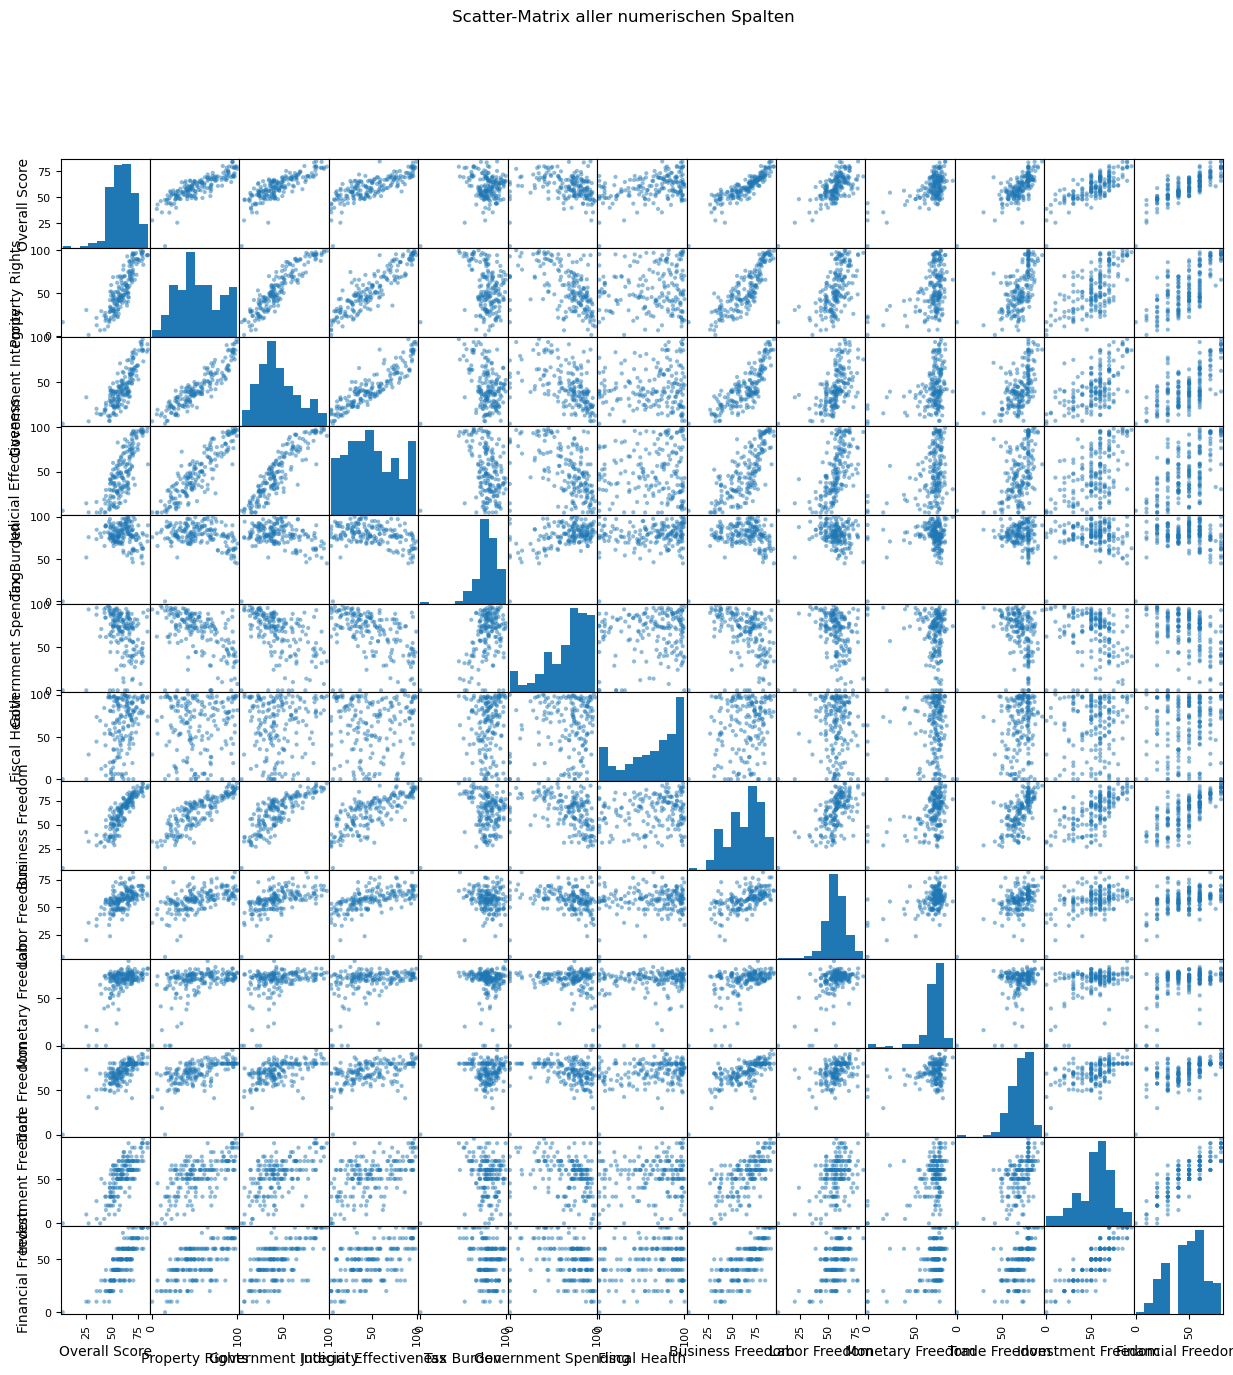

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten einlesen
df = pd.read_csv(r'C:\Users\juanc\Documents\Ausbildung_Informatik\1_Praktikum\Statistik\heritage-index-of-economic-freedom-20250620083959.csv')

# Nur numerische Spalten auswählen (ab Spalte 2, da die ersten beiden 'Country' und 'Index Year' sind)
num_df = df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

# Fehlende Werte entfernen
num_df = num_df.dropna()

# Scatter-Matrix plotten
pd.plotting.scatter_matrix(num_df, alpha=0.5, figsize=(15, 15), diagonal='hist')
plt.suptitle('Scatter-Matrix aller numerischen Spalten')
plt.show()


In [21]:
# Korrelationstabelle berechnen
corr = num_df.corr()

# Korrelationen sortiert anzeigen (z.B. für 'Overall Score')
print(corr['Overall Score'].sort_values(ascending=False))


Overall Score             1.000000
Business Freedom          0.878365
Property Rights           0.835669
Financial Freedom         0.815792
Government Integrity      0.805246
Judicial Effectiveness    0.775692
Investment Freedom        0.769396
Trade Freedom             0.729264
Labor Freedom             0.674162
Monetary Freedom          0.607151
Fiscal Health             0.391999
Tax Burden                0.055853
Government Spending      -0.168524
Name: Overall Score, dtype: float64


In [26]:
import numpy as np

# Nur obere Dreiecksmatrix, um doppelte Werte zu vermeiden
corr_matrix = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Die 5 stärksten Zusammenhänge (nach Betrag)
strong_corrs = corr_matrix.abs().unstack().sort_values(ascending=False).dropna()

# Anzeigegrenze erhöhen, um alle starken Korrelationen zu sehen
pd.set_option('display.max_rows', 1000)
strong_corrs


Government Integrity    Property Rights           0.917103
Judicial Effectiveness  Government Integrity      0.900265
                        Property Rights           0.892983
Business Freedom        Overall Score             0.878365
Financial Freedom       Investment Freedom        0.847558
Business Freedom        Property Rights           0.844760
Property Rights         Overall Score             0.835669
Financial Freedom       Overall Score             0.815792
Business Freedom        Government Integrity      0.810572
Government Integrity    Overall Score             0.805246
Judicial Effectiveness  Overall Score             0.775692
Investment Freedom      Overall Score             0.769396
Business Freedom        Judicial Effectiveness    0.759974
Financial Freedom       Business Freedom          0.751543
Trade Freedom           Overall Score             0.729264
Financial Freedom       Property Rights           0.706205
Trade Freedom           Business Freedom          0.6953